In [101]:
import warnings
from glob import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

warnings.simplefilter(action="ignore", category=FutureWarning)

# Split data

In [102]:
df = pd.read_csv('data/buenos-aires-real-estate-clean.csv', index_col= [0])
df.loc[df['neighborhood'].isna(), 'neighborhood'] = ''

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6582 entries, 0 to 6581
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        6582 non-null   float64
 1   surface_covered_in_m2  6582 non-null   float64
 2   lat                    6316 non-null   float64
 3   lon                    6316 non-null   float64
 4   neighborhood           6582 non-null   object 
dtypes: float64(4), object(1)
memory usage: 308.5+ KB


In [104]:
target = 'price_aprox_usd'
X_train = df.drop([target], axis = 1)
y_train = df[target]

# Build Model

## Baseline

For the baseline model, we will use the mean of the target. This means that regardless of any attributes, we will always guess the house price to be the mean of the dataset

In [105]:
y_mean = y_train.mean()
y_predict_mean = [y_mean] * len(y_train)

print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train, [y_mean]*len(y_train)))

Mean apt price: 132383.83701458524
Baseline MAE: 44860.10834274133


# Linear Regression

## Model Fitting

In [106]:
lr_model = make_pipeline(
            OneHotEncoder(use_cat_names=True),
            SimpleImputer(),
            LinearRegression()
)

lr_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighborhood'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

## Model Evaluation

In [107]:
y_pred_training = lr_model.predict(X_train)
print("Training MAE: ", mean_absolute_error(y_train, y_pred_training))

Training MAE:  24237.287485665867


In [108]:
X_test = pd.read_csv("data/buenos-aires-test-features.csv")
y_pred = pd.Series(lr_model.predict(X_test))
y_pred.head()

0    233622.662652
1    163253.663935
2     68322.301855
3     61981.006714
4    106793.885852
dtype: float64

# Ridge

## Model Fitting

In [109]:
ridge_model = make_pipeline(
            OneHotEncoder(use_cat_names=True),
            SimpleImputer(),
            Ridge()
)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighborhood'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

# Model Evaluation

In [110]:
y_pred_training = ridge_model.predict(X_train)
print("Training MAE: ", mean_absolute_error(y_train, y_pred_training))

Training MAE:  24207.107190330218


In [111]:
X_test = pd.read_csv("data/buenos-aires-test-features.csv")
y_pred = pd.Series(ridge_model.predict(X_test))
y_pred.head()

0    231122.403569
1    162572.942392
2     68477.949626
3     63521.438989
4    105694.463885
dtype: float64

# Feature Importance and Model Equation

In [112]:
lr_intercept = lr_model.named_steps['linearregression'].intercept_
lr_coef = lr_model.named_steps['linearregression'].coef_

lr_ft_imp = pd.Series(lr_coef, index=lr_model.named_steps['onehotencoder'].get_feature_names())
print(f"price = {lr_intercept.round(2)}")
for f, c in lr_ft_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 17243720.63
+ (2208.55 * surface_covered_in_m2)
+ (247000.82 * lat)
+ (148752.49 * lon)
+ (561.93 * neighborhood_Chacarita)
+ (13068.13 * neighborhood_Villa Luro)
+ (12828.15 * neighborhood_Caballito)
+ (-29892.89 * neighborhood_Constitución)
+ (-34183.45 * neighborhood_Once)
+ (-4122.75 * neighborhood_Almagro)
+ (37068.85 * neighborhood_Palermo)
+ (-4705.31 * neighborhood_Flores)
+ (32108.59 * neighborhood_Belgrano)
+ (2685.34 * neighborhood_Liniers)
+ (4505.96 * neighborhood_Villa Crespo)
+ (-6585.68 * neighborhood_San Cristobal)
+ (-23135.85 * neighborhood_Congreso)
+ (4684.8 * neighborhood_Saavedra)
+ (-24869.79 * neighborhood_Balvanera)
+ (-3115.2 * neighborhood_Parque Avellaneda)
+ (41749.64 * neighborhood_Recoleta)
+ (-963.76 * neighborhood_San Telmo)
+ (27746.63 * neighborhood_Nuñez)
+ (25634.43 * neighborhood_Barrio Norte)
+ (-2546.89 * neighborhood_Parque Centenario)
+ (-7425.52 * neighborhood_Abasto)
+ (-14021.59 * neighborhood_Centro / Microcentro)
+ (-10919.61 * ne

Text(0.5, 1.0, 'Linear Regression Feature Importance')

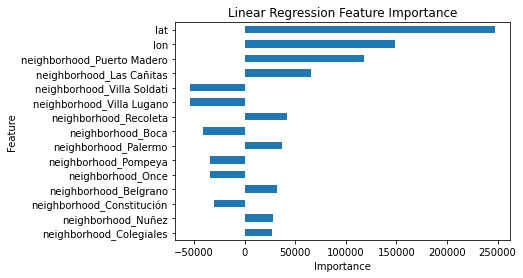

In [113]:
lr_ft_imp.sort_values(key=abs).tail(15).plot(kind = 'barh')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Linear Regression Feature Importance")

In [114]:
ridge_intercept = ridge_model.named_steps['ridge'].intercept_
ridge_coef = ridge_model.named_steps['ridge'].coef_

ridge_ft_imp = pd.Series(ridge_coef, index=ridge_model.named_steps['onehotencoder'].get_feature_names())
print(f"price = {ridge_intercept.round(2)}")
for f, c in ridge_ft_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 7961166.19
+ (2211.9 * surface_covered_in_m2)
+ (98962.19 * lat)
+ (77581.27 * lon)
+ (2724.2 * neighborhood_Chacarita)
+ (3705.86 * neighborhood_Villa Luro)
+ (10890.15 * neighborhood_Caballito)
+ (-28027.25 * neighborhood_Constitución)
+ (-31267.78 * neighborhood_Once)
+ (-3078.59 * neighborhood_Almagro)
+ (41163.44 * neighborhood_Palermo)
+ (-9382.54 * neighborhood_Flores)
+ (37366.49 * neighborhood_Belgrano)
+ (-7757.76 * neighborhood_Liniers)
+ (5792.74 * neighborhood_Villa Crespo)
+ (-6064.39 * neighborhood_San Cristobal)
+ (-20494.1 * neighborhood_Congreso)
+ (9695.16 * neighborhood_Saavedra)
+ (-22723.05 * neighborhood_Balvanera)
+ (-11615.89 * neighborhood_Parque Avellaneda)
+ (46556.41 * neighborhood_Recoleta)
+ (1237.95 * neighborhood_San Telmo)
+ (34239.35 * neighborhood_Nuñez)
+ (30161.76 * neighborhood_Barrio Norte)
+ (-2969.42 * neighborhood_Parque Centenario)
+ (-4310.07 * neighborhood_Abasto)
+ (-9797.14 * neighborhood_Centro / Microcentro)
+ (-9267.7 * neighbo

Text(0.5, 1.0, 'Ridge Feature Importance')

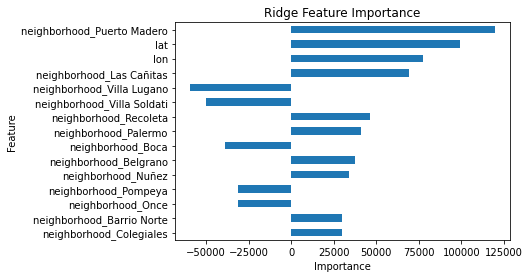

In [115]:
ridge_ft_imp.sort_values(key=abs).tail(15).plot(kind = 'barh')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Ridge Feature Importance")

In [116]:
# Using Ridge
def make_prediction(area, lat, lon, neighborhood):
    data = {'surface_covered_in_m2': area,
           'lat': lat,
           'lon': lon,
           'neighborhood': neighborhood}
    df = pd.DataFrame(data, index = [0])
    prediction = ridge_model.predict(df)
    return f"Predicted apartment price: ${prediction}"

In [117]:
interact(
    make_prediction,
    area=IntSlider(
        min=X_train["surface_covered_in_m2"].min(),
        max=X_train["surface_covered_in_m2"].max(),
        value=X_train["surface_covered_in_m2"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
        value=X_train["lon"].mean(),
    ),
    neighborhood=Dropdown(options=sorted(X_train["neighborhood"].unique())),
)

interactive(children=(IntSlider(value=53, description='area', max=101, min=30), FloatSlider(value=-34.59890626…

<function __main__.make_prediction(area, lat, lon, neighborhood)>